# Questions

- For each participant: 
    - number of messages
    - words per message
    - most used words
    - number of emojis
    - most used emojis
    - most active day of the week


- Sentiment analysis:
    - group sentiment over time
    - sentiment index of each participant
    - pie chart of message sentiments
    - worst and best message and from who
    - wordcloud
    
    
- Over time:
    - timeline
    - spider chart
    - who sends more messages in a given day (day champion)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
from textblob import TextBlob
import operator
from collections import Counter
import emoji

%matplotlib inline

table = pd.DataFrame(columns=('date', 'time', 'sender', 'message'))

In [2]:
data = "data/chat.txt"
language = 'portuguese'
language_code = 'pt'
import re

with open(data) as f:
    raw_message = ""
    counter = 0
    for line in tqdm(f):
        if line.startswith('['):
            # date
            datePattern = '(\d+/\d+/\d+)' 
            try:
                date = re.search(datePattern, raw_message).group(0)
            except AttributeError:
                date = "No date"
            
            # time
            timePattern = '(\d+:\d+:\d+)'
            try:
                time = re.search(timePattern, raw_message).group(0)
            except AttributeError:
                time = "No Time"

            # sender
            personPattern = '((?<=]).+?(?=:))'
            try:
                person = re.search(personPattern, raw_message).group(0).replace("] ", "")
            except AttributeError:
                person = "No Person"
            
            # message
            messagePattern = '(:\s).*'    
            try:
                text = re.search(messagePattern, raw_message).group(0).replace(": ", "")
            except AttributeError:
                text = "No message"
            
            table.loc[counter] = [date, time, person, text]
            counter += 1
        
            raw_message = line
        else:
            raw_message += line
        

13524it [00:18, 746.01it/s]


In [3]:
table = table[~table.message.str.contains("omitted")]
table = table[~table.message.str.contains("No message")]
table = table[~table.message.str.contains("Messages to this group are")]

In [4]:
table

,date,time,sender,message
2,19/10/2016,00:08:02,Pai,Material de lavagem de mãos para médicos na co...
4,19/10/2016,00:21:40,Duarte OC,Wow..
5,19/10/2016,00:21:47,Duarte OC,😓
6,19/10/2016,17:25:44,Locas Oliveira E Carmo,Pai?? Onde e que ta?
7,19/10/2016,18:37:13,Duarte OC,Bem.. Este transito em Lisboa...
8,19/10/2016,18:37:14,Duarte OC,Wow
9,19/10/2016,18:37:51,Mãe,Uau Luisinha! Que bom trabalhar com essa paisa...
10,19/10/2016,20:07:16,Pai,Querida família ... Papá em grande forma na RT...
11,19/10/2016,20:10:45,Pai,Camisa e gravata emprestadas ...
12,19/10/2016,20:12:57,Duarte OC,Muito africano pai...


Text(0.5, 1.0, 'Total Messages')

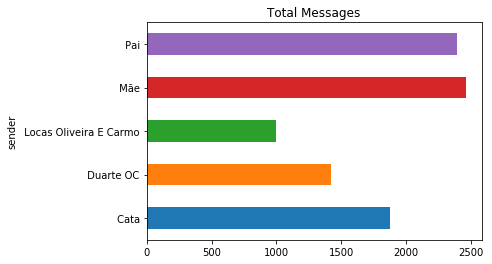

In [5]:
table.groupby('sender').message.count().plot(kind='barh')
plt.title('Total Messages')

Text(0.5, 1.0, 'Words per message')

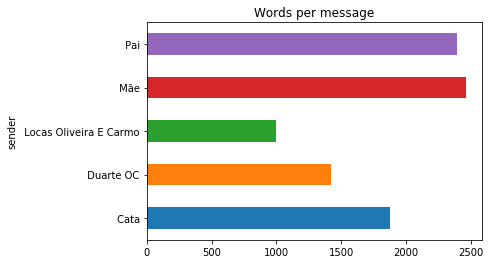

In [6]:
table['message_size'] = table.message.str.split().str.len()
table.groupby('sender').message_size.count().plot(kind='barh')
plt.title('Words per message')

In [10]:
senders = list(set(table.sender))
raw_text = {}

for sender in senders: 
    raw_text[sender] = ""

for idx, row in table.iterrows():
    sender = row.sender
    message = row.message
    raw_text[sender] += message + " "
    
for sender in senders:
    bad_words = stopwords.words('portuguese')
    blob = list(TextBlob(raw_text[sender]).lower().words)
    clean_blob = [word for word in blob if word not in bad_words]
    top_words = Counter(clean_blob).most_common()[0:5]
    print(f"\nTop words for {sender}:")
    for element in top_words:
        print(f"{element[0]} with {element[1]} uses.")

    emoji_list = []
    for item in clean_blob:
        if item in emoji.UNICODE_EMOJI:
            emoji_list.append(item)
    top_emoji = Counter(emoji_list).most_common()[0:3]
    print(f"\nTop emojis for {sender}:")
    for element in top_emoji:
        print(f"{element[0]} with {element[1]} uses.")
    


Top words for  Pai:
boa with 250 uses.
ló with 137 uses.
docas with 129 uses.
catocas with 116 uses.
é with 110 uses.

Top emojis for  Pai:
❤ with 11 uses.
👍 with 9 uses.
🤙 with 5 uses.

Top words for  Cata:
boa with 112 uses.
pai with 108 uses.
é with 85 uses.
agora with 70 uses.
mãe with 69 uses.

Top emojis for  Cata:
😃 with 16 uses.
😁 with 12 uses.
👌 with 11 uses.

Top words for  Locas Oliveira E Carmo:
pai with 75 uses.
nao with 44 uses.
boa with 41 uses.
obrigada with 27 uses.
mae with 26 uses.

Top emojis for  Locas Oliveira E Carmo:
❤ with 13 uses.
😇 with 3 uses.
😀 with 2 uses.

Top words for  Duarte OC:
pai with 119 uses.
boa with 56 uses.
uau with 49 uses.
é with 48 uses.
bem with 47 uses.

Top emojis for  Duarte OC:
😊 with 6 uses.
😂 with 3 uses.
😭 with 3 uses.

Top words for  Mãe:
boa with 115 uses.
catocas with 98 uses.
luisinha with 96 uses.
micas with 91 uses.
é with 89 uses.

Top emojis for  Mãe:
😉 with 53 uses.
😁 with 20 uses.
😊 with 14 uses.


In [11]:
from datetime import datetime
def convert_to_weekday(date_string):
    day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    datetime_object = datetime.strptime(date_string, '%d/%m/%Y')
    return day_names[datetime_object.weekday()]

convert_to_weekday('31/10/2018')

'Wed'

Text(0.5, 1.0, 'Total messages per weekday')

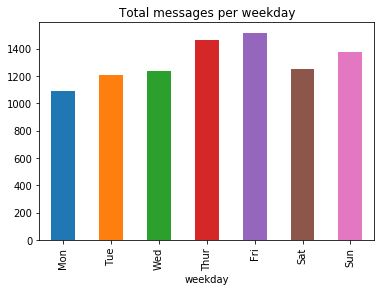

In [12]:
from pandas.api.types import CategoricalDtype
cats = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
cat_type = CategoricalDtype(categories=cats, ordered=True)

table['weekday'] = [convert_to_weekday(element) for element in table['date']]
table.groupby('weekday').message.count().reindex(cats).plot(kind='bar')
plt.title('Total messages per weekday')

Text(0.5, 1.0, 'Total messages per weekday for  Duarte OC')

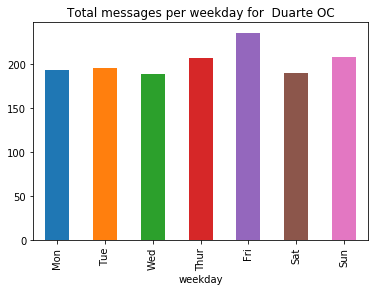

In [13]:
sender = senders[3]
a = table[(table['sender'] == sender)]
a.groupby('weekday').message.count().reindex(cats).plot(kind='bar')
plt.title(f"Total messages per weekday for {sender}")

In [16]:
messages = [message for message in table['message']]
for message in messages: 
    try:
        blob = TextBlob(message)
        print(message, blob.translate(to='en'), blob.translate(to='en').sentiment.polarity, '\n')
    except Exception as e:
        print(str(e))
        

Material de lavagem de mãos para médicos na consulta do hospital ... Handwashing material for doctors in the hospital consultation ... 0.0 

Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Pai?? Onde e que ta? Dad?? Where are you? 0.0 

Bem.. Este transito em Lisboa... Well .. This transit in Lisbon ... 0.0 

Translation API returned the input string unchanged.
Uau Luisinha! Que bom trabalhar com essa paisagem 😍 Wow, Luisinha! How nice to work with this landscape? 0.3625 

Querida família ... Papá em grande forma na RTP África .... Dear family ... Papa in great shape in RTP Africa .... 0.8 

Camisa e gravata emprestadas ... Borrowed shirt and tie ... 0.0 

Muito africano pai... Very African father ... 0.0 

Que nova plataforma What a new platform 0.13636363636363635 

Mas estás muito bonito But you look very handsome. 0.65 

Ainda que um pouco sério... Although a bit serious ... -0.3333333333333333 

Telemedicina ..  Telemedicin

KeyboardInterrupt: 